In [8]:
import matplotlib.pyplot as plt
import os

trace_file = "Q1_tcp-example.tr"

In [9]:
# Initialize lists to store time and queuing delay
time = []
queuing_delay = []
enqueued_times = {}

# Parse the trace file for queuing delay -- format as below
# + time 
# - time
# r time

for line in open(trace_file):
    fields = line.strip().split()
    event = fields[0]
    timestamp = float(fields[1])
    node_id = fields[2]
    packet_info = " ".join(fields[3:])

    # print(f"Parsed Line: {line.strip()}")
    # print(f"Event: {event}, Timestamp: {timestamp}, Node/Device: {node_id}, Packet Info: {packet_info}")

    if event == "+":
        key = packet_info
        enqueued_times[key] = timestamp
        # print("+")
        # print(enqueued_times)
    elif event == "-":
        key = packet_info
        if key in enqueued_times:
            # print("hello")
            delay = timestamp - enqueued_times[key]
            time.append(timestamp)
            queuing_delay.append(delay)
            del enqueued_times[key]


# save the data to a file
with open("Q1_QueingDelay.txt", "w") as f:
    for i in range(len(time)):
        f.write(f"{time[i]} {queuing_delay[i]}\n")


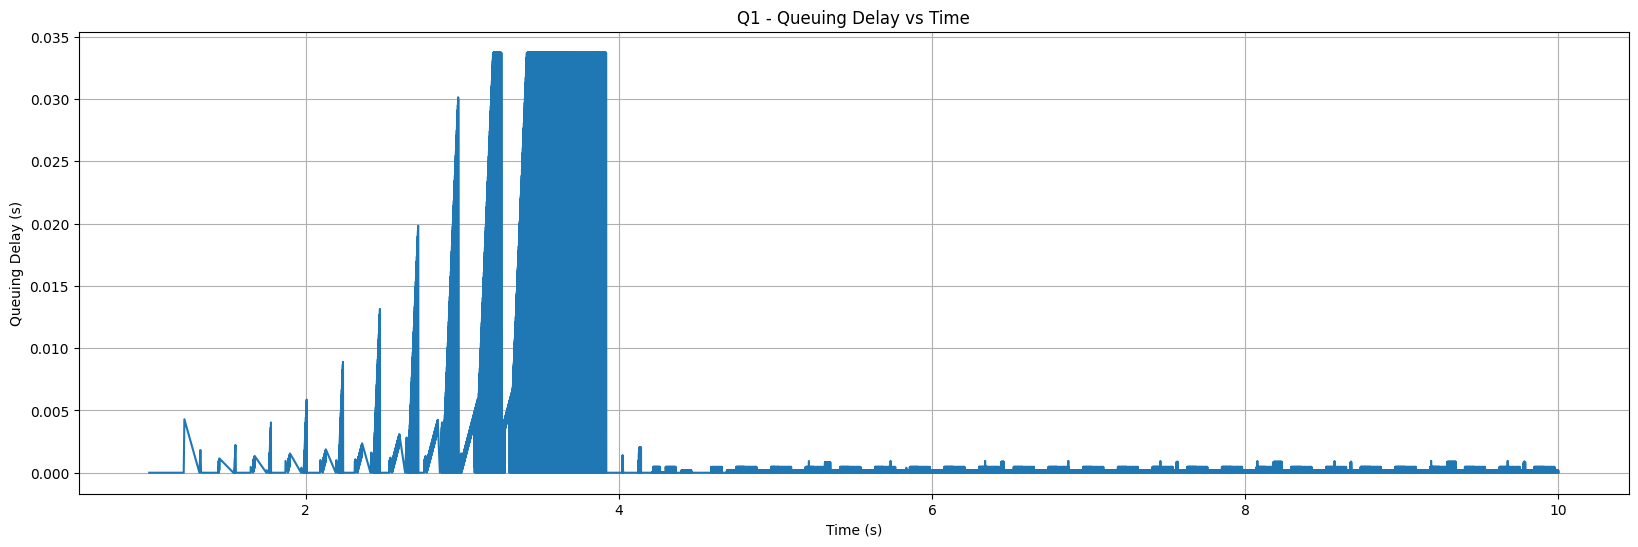

In [10]:
with open("Q1_QueingDelay.txt", "r") as f:
    time = []
    queuing_delay = []
    for line in f:
        fields = line.strip().split()
        time.append(float(fields[0]))
        queuing_delay.append(float(fields[1]))

# Plot the queuing delay
plt.figure(figsize=(20, 6))
plt.plot(time, queuing_delay)
plt.xlabel("Time (s)")
plt.ylabel("Queuing Delay (s)")
plt.title("Q1 - Queuing Delay vs Time")
plt.grid()
plt.savefig("Q1_QueingDelay.png")
plt.show()

In [11]:
# for queuing length
# Initialize lists to store time and queuing length
time = []
queuing_length = []
enqueued_packets = {}

# Parse the trace file for queuing length -- format as below
# + time
# - time
# r time

for line in open(trace_file):
    fields = line.strip().split()
    event = fields[0]
    timestamp = float(fields[1])
    node_id = fields[2]
    packet_info = " ".join(fields[3:])

    # print(f"Parsed Line: {line.strip()}")
    # print(f"Event: {event}, Timestamp: {timestamp}, Node/Device: {node_id}, Packet Info: {packet_info}")

    if event == "+":
        key = packet_info
        enqueued_packets[key] = timestamp
        # print("+")
        # print(enqueued_packets)
    elif event == "-":
        key = packet_info
        if key in enqueued_packets:
            # print("hello")
            time.append(timestamp)
            queuing_length.append(len(enqueued_packets))
            del enqueued_packets[key]

# save the data to a file
with open("Q1_QueingLength.txt", "w") as f:
    for i in range(len(time)):
        f.write(f"{time[i]} {queuing_length[i]}\n")

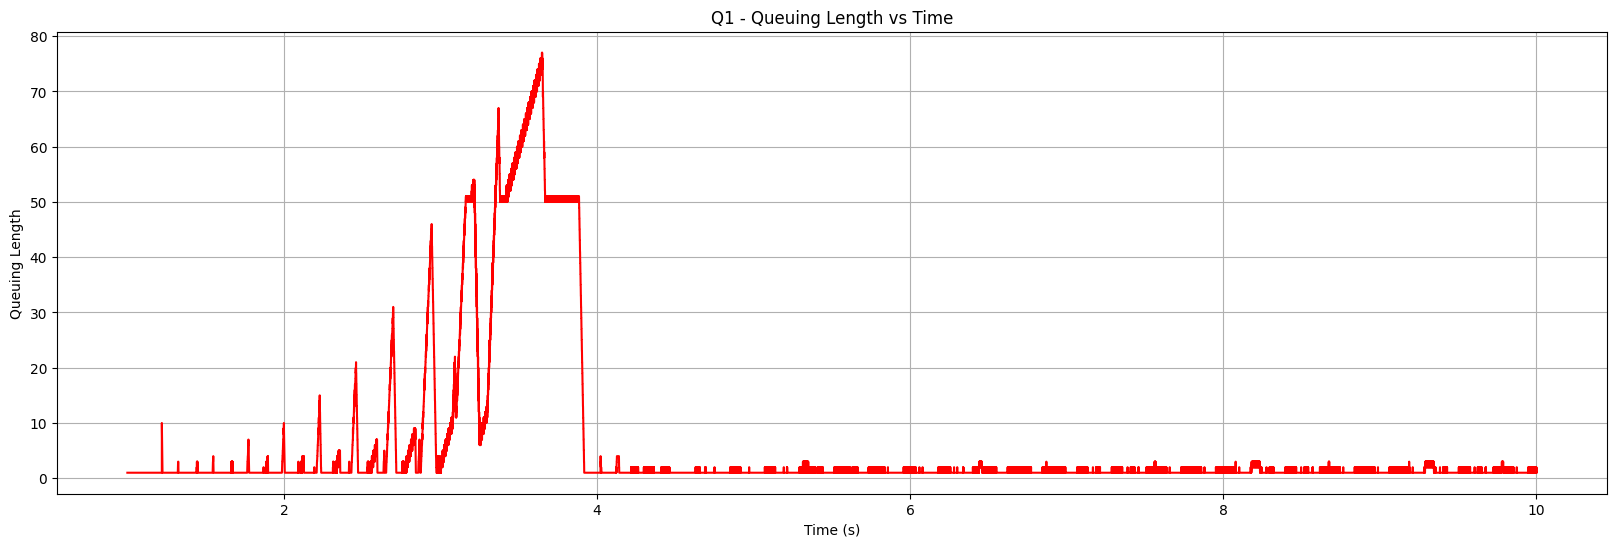

In [12]:
with open("Q1_QueingLength.txt", "r") as f:
    time = []
    queuing_length = []
    for line in f:
        fields = line.strip().split()
        time.append(float(fields[0]))
        queuing_length.append(float(fields[1]))

# Plot the queuing length
plt.figure(figsize=(20, 6))
plt.plot(time, queuing_length, color='red')
plt.xlabel("Time (s)")
plt.ylabel("Queuing Length")
plt.title("Q1 - Queuing Length vs Time")
plt.grid()
plt.savefig("Q1_QueingLength.png")
plt.show()

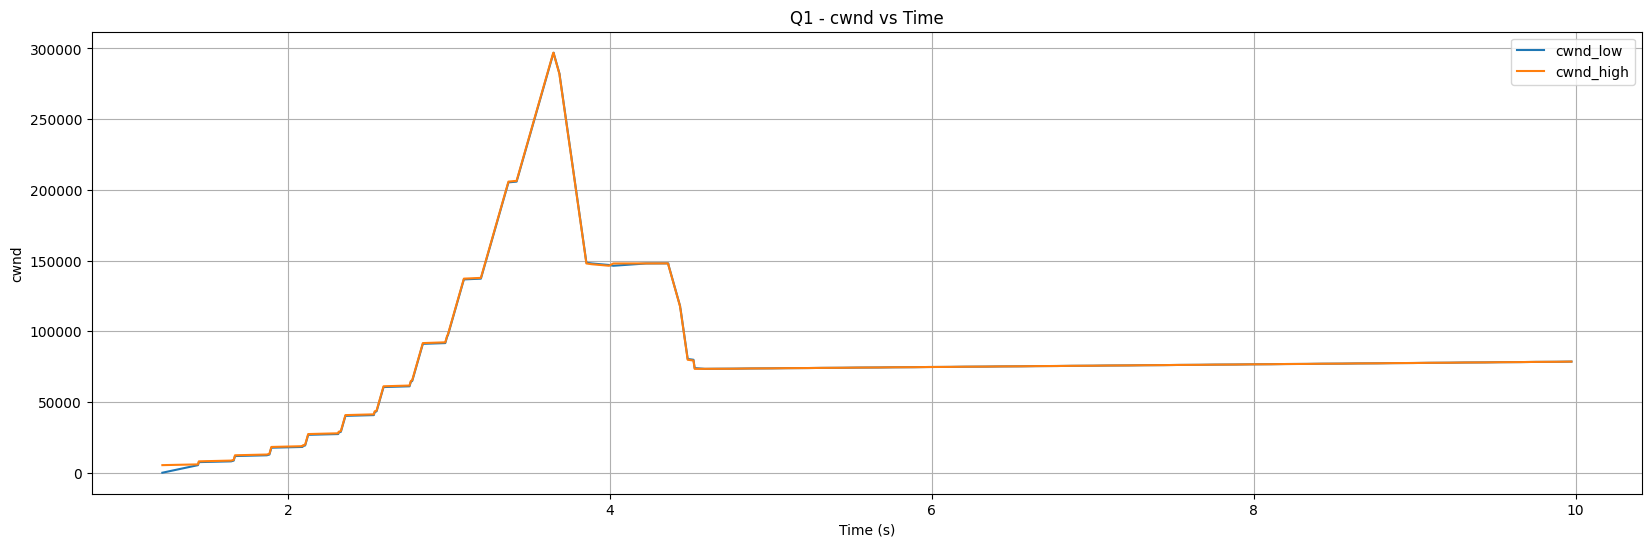

In [13]:
with open("Q1_tcp-example.cwnd", "r") as f:
    time = []
    cwnd_low = []
    cwnd_high = []
    for line in f:
        fields = line.strip().split()
        time.append(float(fields[0]))
        cwnd_low.append(float(fields[1]))
        cwnd_high.append(float(fields[2]))


# Plot the cwnd
plt.figure(figsize=(20, 6))
plt.plot(time, cwnd_low, label="cwnd_low")
plt.plot(time, cwnd_high, label="cwnd_high")
plt.xlabel("Time (s)")
plt.ylabel("cwnd")
plt.title("Q1 - cwnd vs Time")
plt.legend()
plt.grid()
plt.savefig("Q1_cwnd.png")
plt.show()

In [14]:
# using the pcap file to get the throughput
# Initialize lists to store time and throughput
files = ["Q1_tcp-example-0-0.pcap", "Q1_tcp-example-1-0.pcap", "Q1_tcp-example-1-1.pcap", "Q1_tcp-example-2-0.pcap"]
throughput = []

for file in files:
    # Parse the pcap file for throughput
    command = f"tshark -r {file} -q -z io,stat,10,\"SUM(frame.len)frame.len\""
    output = os.popen(command).read()
    # print(output) 
    output = output.split()
    # print(output)
    frame_len = float(output[-4])
    duration = float(output[-6])
    throughput.append(frame_len * 8 / duration / 1000000)

for i, file in enumerate(files):
    print(f"Throughput for {file} is {throughput[i]} Mbps")

Throughput for Q1_tcp-example-0-0.pcap is 3.2745145403899723 Mbps
Throughput for Q1_tcp-example-1-0.pcap is 3.26832 Mbps
Throughput for Q1_tcp-example-1-1.pcap is 3.2656683146067413 Mbps
Throughput for Q1_tcp-example-2-0.pcap is 3.261553830577118 Mbps
